In [1]:
import pandas as pd
import matplotlib.pyplot as plt
#to show plots automatically inline, otherwise use plt.show()
%matplotlib inline 

In [4]:
data = pd.read_csv('iris.dat',sep=',')
data.head()
#len(data)

,sepal-length,sepal-width,petal-length,petal-width,category
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
# select first two columns
d1=data.filter(items=['sepal-length','sepal-width'])
d1.describe()

,sepal-length,sepal-width
count,150.000000,150.000000
mean,5.843333,3.054000
std,0.828066,0.433594
min,4.300000,2.000000
25%,5.100000,2.800000
50%,5.800000,3.000000
75%,6.400000,3.300000
max,7.900000,4.400000


In [5]:
# subset
print(list(data.category.unique()))
#data[data.category=='Iris-setosa']
data[data.category=='Iris-setosa'][['petal-length']].head()

['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']


,petal-length
0,1.4
1,1.4
2,1.3
3,1.5
4,1.4


In [6]:
# transforming data
SLsq = data['sepal-length']*data['sepal-length']
data['sepal-length-sq'] = SLsq
data.describe()

,sepal-length,sepal-width,petal-length,petal-width,sepal-length-sq
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,34.825667
std,0.828066,0.433594,1.764420,0.763161,9.921721
min,4.300000,2.000000,1.000000,0.100000,18.490000
25%,5.100000,2.800000,1.600000,0.300000,26.010000
50%,5.800000,3.000000,4.350000,1.300000,33.640000
75%,6.400000,3.300000,5.100000,1.800000,40.960000
max,7.900000,4.400000,6.900000,2.500000,62.410000


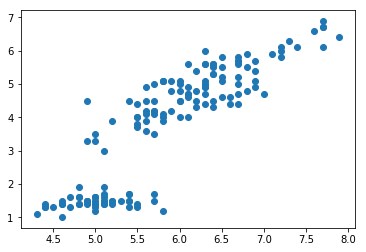

In [8]:
# scatterplot
plt.scatter(data['sepal-length'],data['petal-length'])
#plt.show() #use this instead of %matplotlib inline


Text(0.5,1,'Histogram of Sepal Width')

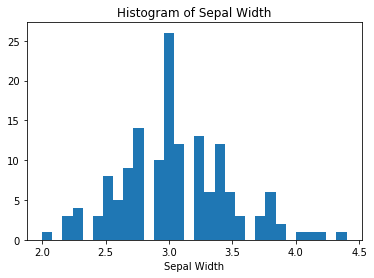

In [10]:
# histogram
# first create a figure and subplots with axes objects for titles
fig, ax = plt.subplots()
ax.hist(data['sepal-width'],bins=30)
ax.set_xlabel('Sepal Width')
ax.set_title('Histogram of Sepal Width')


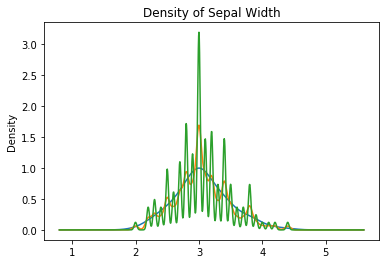

In [17]:
# density
d = data['sepal-width']
fig, ax = plt.subplots()
d.plot.kde(ax=ax, title='Density of Sepal Width')
d.plot.kde(ax=ax, bw_method=0.1)
d.plot.kde(ax=ax, bw_method=0.05)

<BarContainer object of 3 artists>

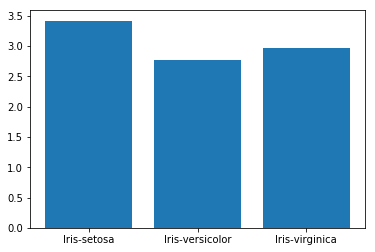

In [18]:
# get average petal length value for each category
means = {}
for cat in list(data.category.unique()):
    means[cat] = float(data[data.category==cat][['sepal-width']].mean())
#means

# barplot showing results
plt.bar(means.keys(), means.values())

Text(0.5,1,'Boxplot of Petal Width')

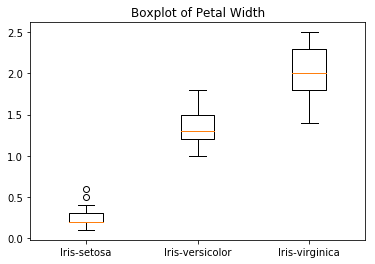

In [19]:
# boxplot
labels = [0,0,0]
dataGrps = [0,0,0]
idx = 0

for cat, cat_data in data.groupby('category'):
    labels[idx]=cat
    #print(list(cat_data['sepal-length']))
    dataGrps[idx]=list(cat_data['petal-width'])
    idx += 1

fig, ax = plt.subplots()
ax.boxplot(dataGrps)
ax.set_xticklabels(labels)
ax.set_title('Boxplot of Petal Width')


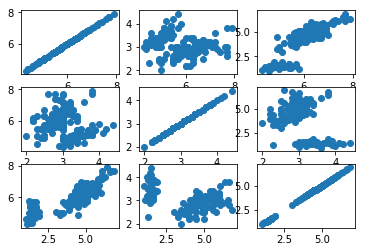

In [20]:
# multiple scatter plots
attrs = list(data.columns)[:3]
#print(attrs)
numattrs = len(attrs)
fig, ax = plt.subplots(nrows=numattrs, ncols=numattrs)
for i in range(numattrs):
    for j in range(numattrs):
        ax[i, j].scatter(data[attrs[i]],data[attrs[j]])
